In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols as sm_ols
from statsmodels.iolib.summary2 import summary_col # nicer tables
import matplotlib.pyplot as plt

In [2]:
merged = pd.read_csv("./inputs/merged.csv")

In [3]:
merged

,Year,Period,Label,SP500_Return,Percent_Change_in_GDP,CPI,Construction_Unemployment_Rate,Manufacturing_Unemployment_Rate,Finance_Unemployment_Rate
0,2005,Q01,2005 Qtr1,-0.0259,4.5,192.366667,11.4,5.3,2.6
1,2005,Q02,2005 Qtr2,0.0091,2.0,193.666667,6.4,4.6,3.2
2,2005,Q03,2005 Qtr3,0.0315,3.2,196.600000,5.6,4.9,3.2
3,2005,Q04,2005 Qtr4,0.0159,2.3,198.433333,6.4,4.8,2.5
4,2006,Q01,2006 Qtr1,0.0373,5.5,199.466667,8.7,4.5,2.6
...,...,...,...,...,...,...,...,...,...
67,2021,Q04,2021 Qtr4,0.1040,7.0,278.706667,4.6,3.1,2.2
68,2022,Q01,2022 Qtr1,-0.0518,-1.6,284.893667,6.6,3.3,2.1
69,2022,Q02,2022 Qtr2,-0.1663,-0.6,291.535667,4.0,3.0,1.5
70,2022,Q03,2022 Qtr3,-0.0517,3.2,295.495667,3.6,3.1,1.2


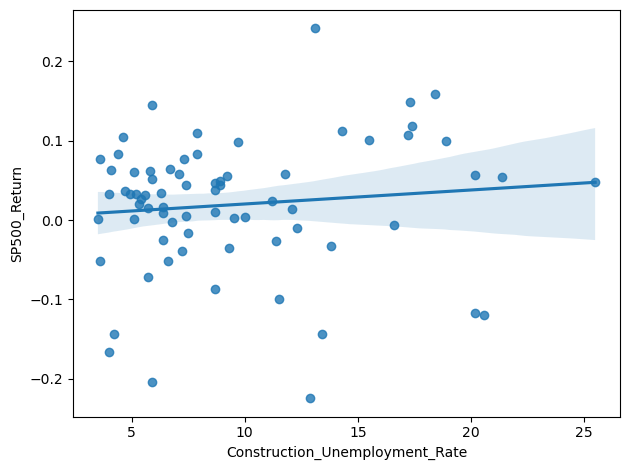

In [4]:
sns.regplot(x='Construction_Unemployment_Rate', y='SP500_Return', data=merged)

plt.tight_layout()
plt.show()

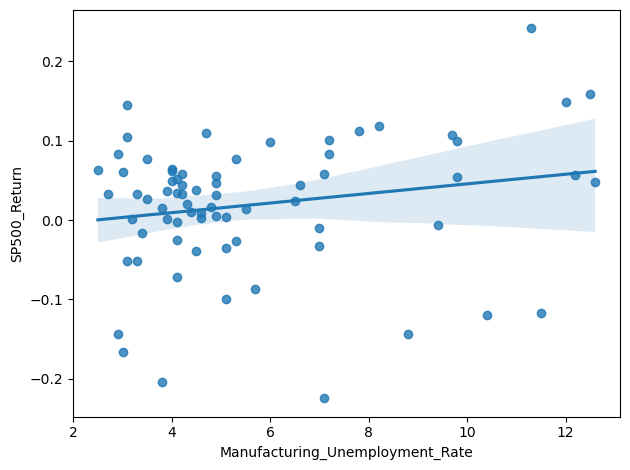

In [5]:
sns.regplot(x='Manufacturing_Unemployment_Rate', y='SP500_Return', data=merged)
plt.tight_layout()
plt.show()

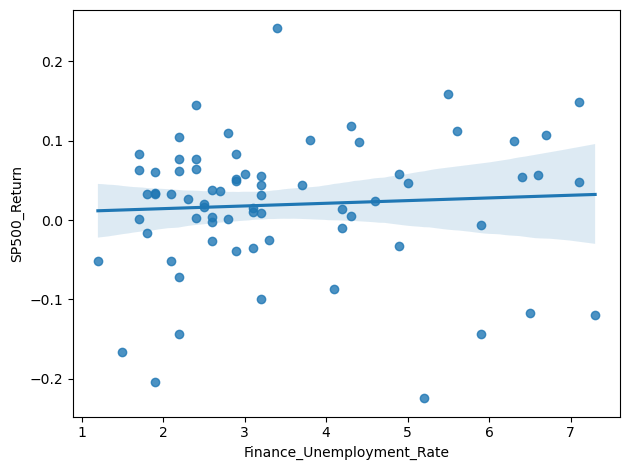

In [6]:
sns.regplot(x='Finance_Unemployment_Rate', y='SP500_Return', data=merged)
plt.tight_layout()
plt.show()

In [7]:
reg1 = sm_ols('SP500_Return ~ np.log(Construction_Unemployment_Rate)', data = merged).fit()

In [8]:
reg2 = sm_ols('SP500_Return ~ np.log(Manufacturing_Unemployment_Rate)', data = merged).fit()

In [9]:
reg3 =  sm_ols('SP500_Return ~ np.log(Finance_Unemployment_Rate)', data = merged).fit()

In [10]:
reg4 =  sm_ols('SP500_Return ~ Construction_Unemployment_Rate + Manufacturing_Unemployment_Rate + Finance_Unemployment_Rate', data = merged).fit()

In [11]:
info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}
info_dict={'No. observations' : lambda x: "{:,.0f}".format(x.nobs)}
table = summary_col(results=[reg1,reg2,reg3,reg4],
                    float_format='%0.2f',
                    stars = True,
                    model_names=['Reg1','Reg2','Reg3','Reg4'],
                    info_dict=info_dict,
                    regressor_order=['Intercept','np.log(Construction_Unemployment_Rate)','np.log(Manufacturing_Unemployment_Rate)','np.log(Finance_Unemployment_Rate)'],
                   
                   )
table.add_title('OLS Regressions of S&P 500 Return')
print(table)

                 OLS Regressions of S&P 500 Return
                                         Reg1   Reg2   Reg3   Reg4 
-------------------------------------------------------------------
Intercept                               -0.02  -0.04  -0.00  -0.01 
                                        (0.04) (0.04) (0.03) (0.02)
np.log(Construction_Unemployment_Rate)  0.02                       
                                        (0.02)                     
np.log(Manufacturing_Unemployment_Rate)        0.03                
                                               (0.02)              
np.log(Finance_Unemployment_Rate)                     0.02         
                                                      (0.02)       
Construction_Unemployment_Rate                               -0.01 
                                                             (0.01)
Finance_Unemployment_Rate                                    -0.02 
                                                             (0.0